# EXTRACCIÓN DE DATOS

Conexión a API y fuentes externas de datos.

In [1]:
from extract_transform import extract_transform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mapa_conexion, accesos_tecnologia_localidad, accesos_velocidad_provincia, velocidad_bajada, penetracion, accesos_bandas, accesos_tipo_conexion, accesos_rango_velocidad, accesos_velocidad_bajada, ingresos_operador, datos_macroeconomicos, provincias, localidades, periodos, data_poblacion = extract_transform()

# EDA
Análisis Telecomunicaciones en Argentina
*Acceso a Internet*

### Comportamiento de conexiones a internet 2014 a 2022

Entre el 2014 y el 2022, el número de conexiones a internet en argentina ha crecido un 73,3%, **pasando de poco más de 6 millones en 2014 a más de 11 millones en el tercer trimestre de 2022**. Las conexiones Cablemódem se han convertido en el principal tipo de conexión con más de 6 millones de conexiones activas para 2022, ésto gracias a su facil despliegue, bajo costo y mejora en el ancho de banda comparado con la técnología ADSL.

Sin embargo, desde 2018 con el início del despliegue de redes con tecnología de Fibra óptica domiciliarias, se ha iniciado la migración tecnológica acompañada de un incremento en la velocidad contratada, debido principalmente al relevo generacional de los Milenials que trae consigo nuevos hábitos de consumo digitales (Streaming, Gaming, Redes Sociales, entre otros). 

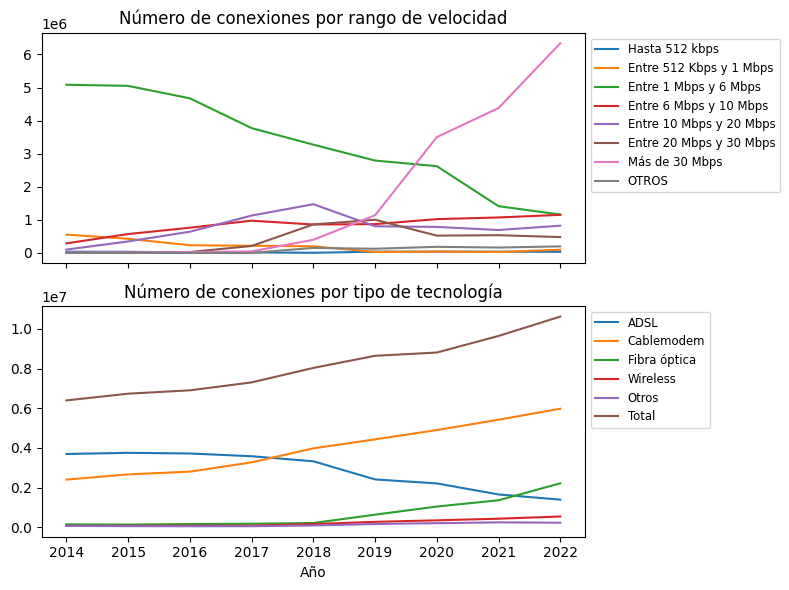

In [341]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

ax = fig.add_subplot(2,1,1)
p1 = accesos_rango_velocidad.drop(columns=['Trimestre','Total']).groupby(by='Año').min().plot(ax=ax).legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
x_ax = p1.axes.get_xaxis()
plt.title('Número de conexiones por rango de velocidad')

ax2 = fig.add_subplot(2,1,2, sharex=ax)
p2 = accesos_tipo_conexion.drop(columns=['Trimestre']).groupby(by='Año').min().plot(ax=ax2).legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
x_ax2 = p2.axes.get_xaxis()
plt.title('Número de conexiones por tipo de tecnología')



fig.tight_layout()
plt.show()


Por otra parte, aunque el número de conexiones a internet sigue creciendo, argentina (con 76.6 conexiones por cada 100 hogares) continúa por debajo del promedio en América Continental que se encuntra en 81.4 conexiones por cada 100 hogares en 2021 (1). Este panorama es incluso peor frente a la adopción de fibra óptica domiciliaria, donde Argentina se encuentra en último lugar con solo el 20,2 por debajo incluso de paises vecinos como Chile y Brassil (2) debido a las fuertes regulaciones existentes y el DNU de regulación de precios.(3). 

(1) https://es.statista.com/estadisticas/598732/hogares-con-acceso-a-internet-en-el-mundo-por-region

(2) https://www.iprofesional.com/tecnologia/368248-conexiones-de-fibra-optica-cual-es-el-puesto-de-argentina

(3) https://www.iprofesional.com/tecnologia/369795-obstaculos-el-largo-camino-de-la-fibra-optica-en-argentina

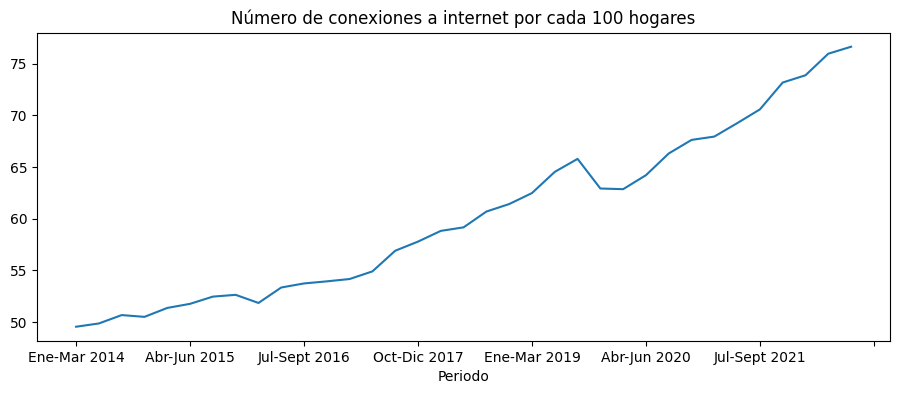

In [342]:
penetracion.drop(columns=['Accesos por cada 100 hab']).sort_values(by=['Año', 'Trimestre']).plot(x='Periodo', y='Accesos por cada 100 hogares', figsize=(11,4), legend=False)

plt.title('Número de conexiones a internet por cada 100 hogares')
plt.show()

### Velocidad de conexión

A partir de 2018, **la velocidad máxima de bajada ha crecido de forma sostenida a un ritmo cercano a los 20 Mbps por año.** Sin embargo, el mayor número de conexiones de alta velocidad se encuentra en los centros poblados donde se ha realizado el despliegue de redes de Fibra ótica, como Caba, Buenos Aires, Cordoba y Tucuman.

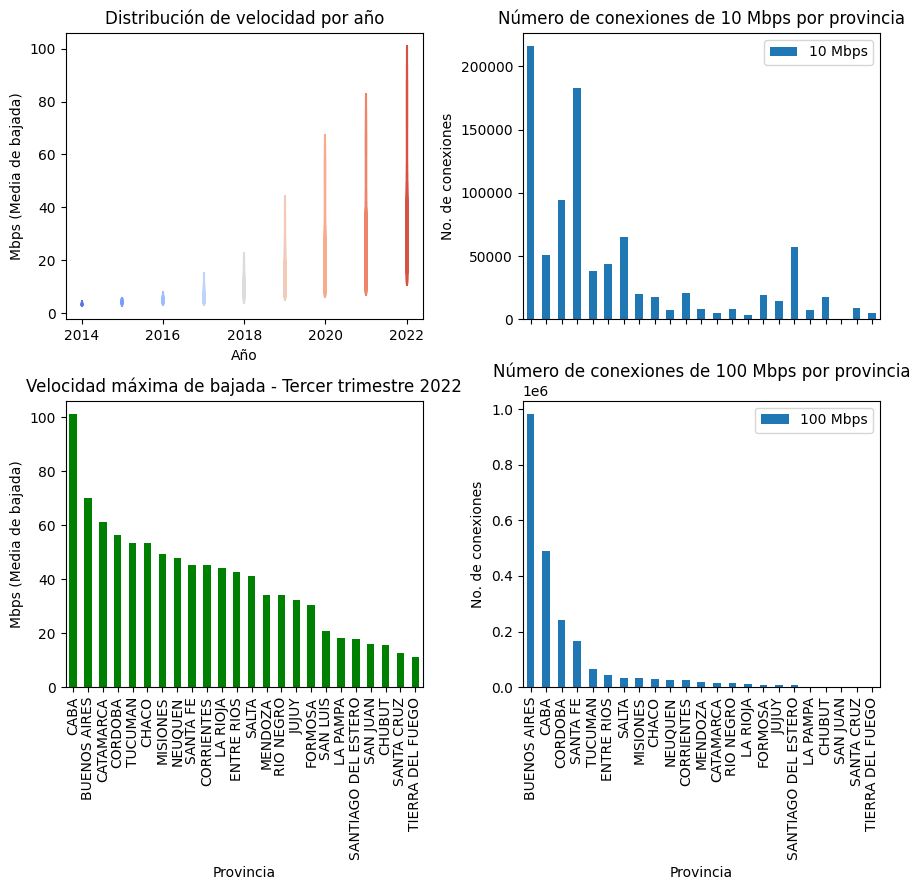

In [343]:
fig= plt.figure()
fig.set_figheight(9)
fig.set_figwidth(9)

ax = fig.add_subplot(2,2,1)
colors = sns.color_palette("coolwarm", velocidad_bajada.Año.nunique())
ax.set_prop_cycle('color', colors)

for i, gp in velocidad_bajada.drop(columns=['Trimestre']).groupby(by=['Año']):
    gp.plot(x='Año', y='Mbps (Media de bajada)', ax=ax, legend=False, kind='line')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Distribución de velocidad por año')

ax2 = fig.add_subplot(2,2,3)
velocidad_bajada.query('Año == 2022').groupby('Provincia').max().drop(columns=['Año','Trimestre']).sort_values(by=['Mbps (Media de bajada)'], ascending=False).plot(kind='bar', ax=ax2, legend=False, color='green')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Velocidad máxima de bajada - Tercer trimestre 2022')

ax3 = fig.add_subplot(2,2,2)
accesos_velocidad_bajada[accesos_velocidad_bajada['10 Mbps']>0].query('Año == 2022 & Trimestre == 3').sort_values(by='100 Mbps', ascending=False)[['Provincia','10 Mbps']].plot(kind='bar', x='Provincia', ax=ax3)
plt.ylabel('No. de conexiones')
plt.title('Número de conexiones de 10 Mbps por provincia')

ax4 = fig.add_subplot(2,2,4, sharex=ax3)
accesos_velocidad_bajada[accesos_velocidad_bajada['100 Mbps']>0].query('Año == 2022 & Trimestre == 3').sort_values(by='100 Mbps', ascending=False)[['Provincia','100 Mbps']].plot(kind='bar', x='Provincia', ax=ax4)
plt.ylabel('No. de conexiones')
plt.title('Número de conexiones de 100 Mbps por provincia')

fig.tight_layout()
plt.show()

### Distribución demografíca

La mayor parte de la población se distribuye en los grandes centros poblados como Buenos Aires, Cordoba, Santa Fe y CABA. En promedio, hay 2,5 personas por cada vivienda particular, sin embargo, este promedio es mucho menor en CABA donde hay  solo 1,9 personas por cada vivienda particular. 

Este fenómeno se da en gran medida como resultado de la devaluación del metro cuadrado de vivienda en el área (1) y la tendencia creciente a hogares unipersonales como poryecto de vida de los Milenials.

(1) https://www.infobae.com/economia/2022/06/19/mercado-inmobiliario-en-que-barrios-portenos-bajaron-mas-los-precios-de-los-departamentos/

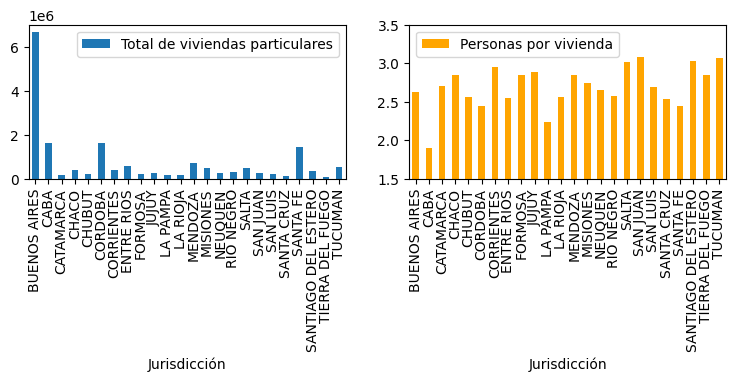

Total de viviendas particulares        17780210
Total de población                     46044703
Población en viviendas particulares    45767858
dtype: int64
Promedio de personas por vivienda: 2.692377167553539


In [344]:
fig = plt.figure()
fig.set_figheight(2)
fig.set_figwidth(9)

width = 0.5

ax = fig.add_subplot(1,2,1)
data_poblacion.sort_values(by=['Jurisdicción']).plot(x='Jurisdicción', y = 'Total de viviendas particulares', kind='bar', ax=ax, width=width)

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(1.5,3.5)
data_poblacion.sort_values(by=['Jurisdicción']).plot(x='Jurisdicción', y = 'Personas por vivienda', ax=ax2, kind='bar', color='orange', width=width)

plt.show()

print(data_poblacion.drop(columns=['Personas por vivienda', 'Jurisdicción']).sum())
print('Promedio de personas por vivienda: ' + str(data_poblacion['Personas por vivienda'].mean()))

### Ingresos generados por operadores

Los ingresos generados por la prestación del servicio de internet, son directamente proporcionales a la penetración del servicio a nivel nacional. 

Sin embargo, para 2019 con un escenario inflacional sin presedentes(1) los operadores incrementaron significativamente los precios del servicio(2) manteniendo el crecimiento en sus ingresos a pesar de haber una disminución en el número de usuarios activos.

No se encuentra ninguna relación entre el precio del dolar y los ingresos de los operadores, ya que las cuentas se cobran en pesos argentinos. Sin embargo, **la variación del precio del dolar impacta negativamente la inversión en infraestructura de telecomuniaciones** ya que le mayor parte de los insumos requeridos para los proyectos de modernización son importados.

(1) https://elpais.com/economia/2020/01/15/actualidad/1579119241_444665.html

(2) https://www.lanacion.com.ar/tecnologia/segun-indec-servicios-telefonia-movil-internet-aumentaron-nid2325651

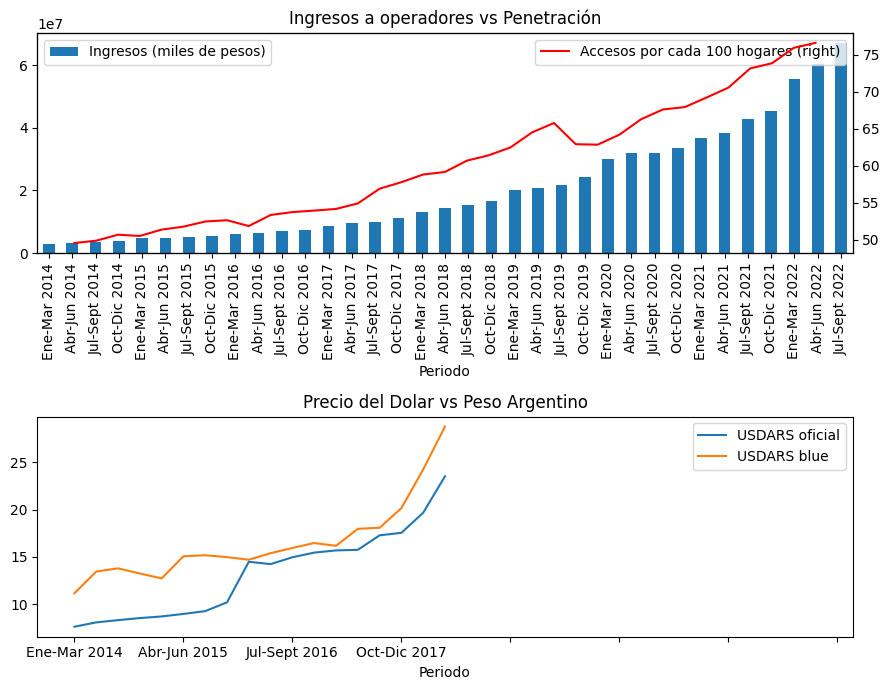

In [3]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(9)

ax = fig.add_subplot(2,1,1)
g1 = pd.concat([ingresos_operador,penetracion.drop(columns=['Periodo','Año','Trimestre'])],axis=1).sort_values(by=['Año','Trimestre']).plot(y='Ingresos (miles de pesos)', x='Periodo', ax=ax, kind='bar', legend=True)

ax2 = ax.twiny()
g2 = pd.concat([ingresos_operador,penetracion.drop(columns=['Periodo','Año','Trimestre'])],axis=1).sort_values(by=['Año','Trimestre']).plot(y='Accesos por cada 100 hogares', x='Periodo', ax=ax2, color='r', secondary_y=True)
x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)
plt.title('Ingresos a operadores vs Penetración')

ax3 = fig.add_subplot(2,1,2, sharex = ax2)
datos_macroeconomicos.merge(periodos).sort_values(by=['Año','Trimestre'],ascending=True)[['USDARS oficial','USDARS blue','Periodo']].plot(x='Periodo', ax=ax3)
plt.title('Precio del Dolar vs Peso Argentino')

fig.tight_layout()
plt.show()